In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/PaqTcPB-Inclui-UFCG/dados/refs/heads/main/dados_estudantes.csv"
dados = pd.read_csv(url)

In [ ]:
dados['velocidade_media'] = pd.to_numeric(dados['velocidade_media'], errors='coerce')
dados['notas_acumuladas'] = pd.to_numeric(dados['notas_acumuladas'], errors='coerce')

In [ ]:
for column in dados.select_dtypes(include=['number']).columns:
    dados[column] = dados[column].fillna(dados[column].mean())

In [ ]:
dados.columns

Index(['codigo_do_curso', 'nome_do_curso', 'turno_do_curso',
       'codigo_do_curriculo', 'campus', 'nome_do_campus', 'codigo_do_setor',
       'nome_do_setor', 'estado_civil', 'genero', 'idade', 'situacao',
       'motivo_de_evasao', 'periodo_de_evasao', 'forma_de_ingresso',
       'periodo_de_ingresso', 'nacionalidade', 'local_de_nascimento',
       'naturalidade', 'cor', 'deficiencias', 'ano_de_conclusao_ensino_medio',
       'tipo_de_ensino_medio', 'politica_afirmativa',
       'prac_renda_per_capita_ate', 'creditos_do_cra', 'notas_acumuladas',
       'periodos_completados', 'creditos_tentados', 'creditos_completados',
       'creditos_isentos', 'creditos_falhados', 'creditos_suspensos',
       'creditos_em_andamento', 'velocidade_media', 'taxa_de_sucesso',
       'prac_atualizado', 'prac_atualizado_em', 'prac_cor', 'prac_quilombola',
       'prac_indigena_aldeado', 'prac_deficiente', 'prac_deficiencias',
       'prac_deslocou_mudou', 'ufpb'],
      dtype='object')

In [ ]:
dados['prac_renda_per_capita_ate'].unique()

array([ 7.32386868,  0.5       ,  1.        ,  1.5       ,  5.        ,
       10.        , 99.        ])

In [ ]:
entrada = dados[['creditos_do_cra', 'periodos_completados', 'creditos_falhados', 'velocidade_media', 'creditos_em_andamento', 'creditos_suspensos', 'creditos_isentos', 'creditos_completados', 'creditos_tentados', 'periodos_completados', 'notas_acumuladas']]
alvo = dados['taxa_de_sucesso']

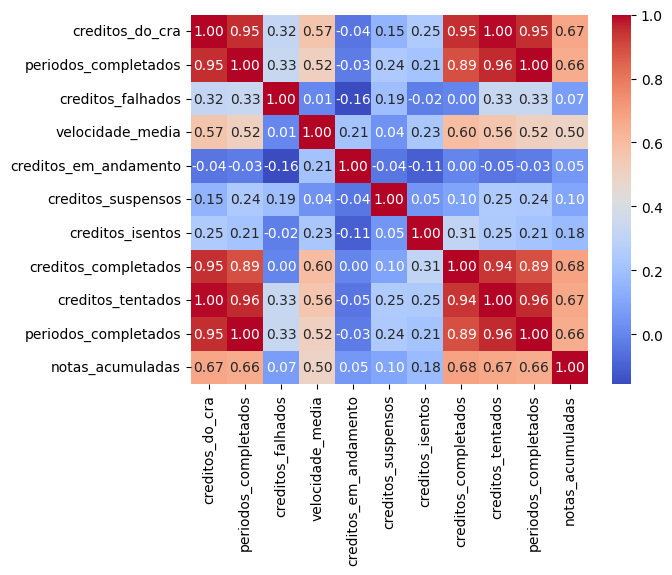

In [ ]:
sns.heatmap(entrada.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
dados['notas_acumuladas'].unique()

array([117.2       , 375.60589863,   0.        , ..., 178.6       ,
       676.        , 411.8       ])

In [ ]:
train, test, res_train, res_test = train_test_split(entrada, alvo, test_size=0.3, random_state=42)

In [ ]:
modelo = LinearRegression()

In [ ]:
scores_eam = cross_val_score(modelo, train, res_train, cv=5, scoring='neg_mean_absolute_error')

In [ ]:
scores_ream = cross_val_score(modelo, train, res_train, cv=5, scoring='neg_root_mean_squared_error')

In [ ]:
mean_eam = -np.mean(scores_eam)
mean_ream = -np.mean(scores_ream)

In [ ]:
print("Validação Cruzada (Treino):")
print(f"MAE médio (5 folds): {mean_eam:.2f}")
print(f"RMSE médio (5 folds): {mean_ream:.2f}")

Validação Cruzada (Treino):
MAE médio (5 folds): 0.12
RMSE médio (5 folds): 0.16


In [ ]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [ ]:
modelo.fit(train, res_train)

LinearRegression()

In [ ]:
pred = modelo.predict(test)

In [ ]:
eam = mean_absolute_error(res_test, pred)
ream = np.sqrt(mean_squared_error(res_test, pred))

1. EAM equivale a Erro Médio Absoluto - quão longe, em média, as previsões do modelo estão dos valores reais
2. REAM equivale ao erro quadrático médio - calcula a raiz quadrada da média dos quadrados das diferenças entre os valores reais e previsto, penaliza maiores erros

In [ ]:
print(f'EAM: {eam}')
print(f'REAM: {ream}')

EAM: 0.11991321192527399
REAM: 0.1682213054270091


In [ ]:
for i, p in enumerate(pred):
  print(f"{i+1}: valor previsto: {p:.2f}, valor real: {res_test.iloc[i]:.2f}")

1: valor previsto: 0.06, valor real: 0.00
2: valor previsto: 0.47, valor real: 0.92
3: valor previsto: 0.09, valor real: 0.00
4: valor previsto: 0.09, valor real: 0.00
5: valor previsto: 0.04, valor real: 0.00
6: valor previsto: 0.77, valor real: 1.00
7: valor previsto: 0.09, valor real: 0.00
8: valor previsto: 0.09, valor real: 0.00
9: valor previsto: 0.09, valor real: 0.00
10: valor previsto: 0.42, valor real: 0.49
11: valor previsto: 0.13, valor real: 0.00
12: valor previsto: 0.79, valor real: 0.88
13: valor previsto: 0.13, valor real: 0.00
14: valor previsto: 1.05, valor real: 1.00
15: valor previsto: 0.83, valor real: 0.80
16: valor previsto: 0.56, valor real: 1.00
17: valor previsto: 0.98, valor real: 0.98
18: valor previsto: 1.33, valor real: 1.00
19: valor previsto: 0.30, valor real: 0.36
20: valor previsto: 0.09, valor real: 0.00
21: valor previsto: 0.47, valor real: 0.48
22: valor previsto: 0.31, valor real: 0.42
23: valor previsto: 0.68, valor real: 0.80
24: valor previsto: 